In [1]:
import matplotlib.cm
import matplotlib.pyplot as plt
import numpy as np
import math

%matplotlib inline

In [2]:
# get the figure
f = plt.imread("luna_bw.png")

In [3]:
f

array([[ 0.57647061,  0.50980395,  0.46666667, ...,  0.46666667,
         0.49803922,  0.53333336],
       [ 0.46666667,  0.5411765 ,  0.53725493, ...,  0.49803922,
         0.51372552,  0.56862748],
       [ 0.45490196,  0.50980395,  0.52156866, ...,  0.41960785,
         0.49803922,  0.61176473],
       ..., 
       [ 0.9254902 ,  0.96078432,  0.73725492, ...,  0.33333334,
         0.53725493,  0.52156866],
       [ 0.88627452,  0.88627452,  0.87843138, ...,  0.29019609,
         0.29803923,  0.58823532],
       [ 0.81568629,  0.83137256,  0.66274512, ...,  0.16078432,
         0.41176471,  0.49411765]], dtype=float32)

In [4]:
# two dimension FFT -- F is complex
F = np.fft.fft2(f)

print(f.shape)
print(F.shape)

(256, 256)
(256, 256)


In [5]:
# find the mag and phase -- shift to put 0 wavenumber at the center
F_mag = np.abs(np.fft.fftshift(F))
F_phase = np.angle(np.fft.fftshift(F))

In [6]:
F_mag

array([[ 9.98039443,  2.71431429,  6.14032666, ...,  2.17907572,
         6.14032666,  2.71431429],
       [ 9.93549561,  1.90480901,  4.52630894, ...,  2.57182826,
         4.21702805,  9.8264927 ],
       [ 6.5738788 ,  6.70985307,  5.13587562, ...,  2.99041661,
         1.82605595,  4.79591509],
       ..., 
       [ 9.14700969,  8.44117437,  7.24403031, ...,  2.41109941,
         2.55853066,  1.68524578],
       [ 6.5738788 ,  4.79591509,  1.82605595, ...,  7.16834077,
         5.13587562,  6.70985307],
       [ 9.93549561,  9.8264927 ,  4.21702805, ...,  8.36063016,
         4.52630894,  1.90480901]])

In [7]:
F_phase

array([[ 0.        ,  1.24917714,  0.04121411, ...,  0.09134338,
        -0.04121411, -1.24917714],
       [ 0.39839302,  2.29710743, -2.96497534, ..., -2.71600049,
         2.05424193,  1.62414028],
       [ 0.18932616, -2.05097421, -0.79439475, ..., -0.28421282,
        -0.29594227, -1.64400196],
       ..., 
       [-1.17333488, -1.14806238, -0.77369072, ...,  2.12479911,
        -1.01960816,  1.45690203],
       [-0.18932616,  1.64400196,  0.29594227, ...,  1.90469141,
         0.79439475,  2.05097421],
       [-0.39839302, -1.62414028, -2.05424193, ..., -2.93756875,
         2.96497534, -2.29710743]])

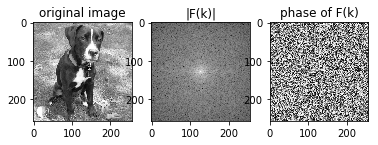

In [8]:
plt.rc("font", size=10)

plt.subplot(131)
plt.imshow(f, cmap=matplotlib.cm.Greys_r)
plt.title("original image")

plt.subplot(132)
plt.imshow(np.log(F_mag), cmap=matplotlib.cm.Greys_r)
plt.title("|F(k)|")

plt.subplot(133)
plt.imshow(F_phase, cmap=matplotlib.cm.Greys_r)
plt.title("phase of F(k)")

plt.show()

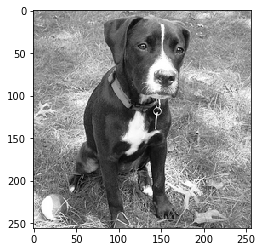

In [9]:
Fnew = F_mag*np.exp(1j*F_phase)
fnew = np.fft.ifft2(np.fft.ifftshift(Fnew))
plt.imshow(np.abs(fnew), cmap=matplotlib.cm.Greys_r)

In [10]:
np.abs(fnew)

array([[ 0.57647061,  0.50980395,  0.46666667, ...,  0.46666667,
         0.49803922,  0.53333336],
       [ 0.46666667,  0.5411765 ,  0.53725493, ...,  0.49803922,
         0.51372552,  0.56862748],
       [ 0.45490196,  0.50980395,  0.52156866, ...,  0.41960785,
         0.49803922,  0.61176473],
       ..., 
       [ 0.9254902 ,  0.96078432,  0.73725492, ...,  0.33333334,
         0.53725493,  0.52156866],
       [ 0.88627452,  0.88627452,  0.87843138, ...,  0.29019609,
         0.29803923,  0.58823532],
       [ 0.81568629,  0.83137256,  0.66274512, ...,  0.16078432,
         0.41176471,  0.49411765]])

In [11]:
f

array([[ 0.57647061,  0.50980395,  0.46666667, ...,  0.46666667,
         0.49803922,  0.53333336],
       [ 0.46666667,  0.5411765 ,  0.53725493, ...,  0.49803922,
         0.51372552,  0.56862748],
       [ 0.45490196,  0.50980395,  0.52156866, ...,  0.41960785,
         0.49803922,  0.61176473],
       ..., 
       [ 0.9254902 ,  0.96078432,  0.73725492, ...,  0.33333334,
         0.53725493,  0.52156866],
       [ 0.88627452,  0.88627452,  0.87843138, ...,  0.29019609,
         0.29803923,  0.58823532],
       [ 0.81568629,  0.83137256,  0.66274512, ...,  0.16078432,
         0.41176471,  0.49411765]], dtype=float32)

In [12]:
Fnew = np.fft.fft2(np.abs(fnew))
Fnew_mag = np.abs(np.fft.fftshift(Fnew))
Fnew_phase = np.angle(np.fft.fftshift(Fnew))

In [13]:
Fnew_mag

array([[ 9.98039443,  2.71431429,  6.14032666, ...,  2.17907572,
         6.14032666,  2.71431429],
       [ 9.93549561,  1.90480901,  4.52630894, ...,  2.57182826,
         4.21702805,  9.8264927 ],
       [ 6.5738788 ,  6.70985307,  5.13587562, ...,  2.99041661,
         1.82605595,  4.79591509],
       ..., 
       [ 9.14700969,  8.44117437,  7.24403031, ...,  2.41109941,
         2.55853066,  1.68524578],
       [ 6.5738788 ,  4.79591509,  1.82605595, ...,  7.16834077,
         5.13587562,  6.70985307],
       [ 9.93549561,  9.8264927 ,  4.21702805, ...,  8.36063016,
         4.52630894,  1.90480901]])

In [14]:
F_mag

array([[ 9.98039443,  2.71431429,  6.14032666, ...,  2.17907572,
         6.14032666,  2.71431429],
       [ 9.93549561,  1.90480901,  4.52630894, ...,  2.57182826,
         4.21702805,  9.8264927 ],
       [ 6.5738788 ,  6.70985307,  5.13587562, ...,  2.99041661,
         1.82605595,  4.79591509],
       ..., 
       [ 9.14700969,  8.44117437,  7.24403031, ...,  2.41109941,
         2.55853066,  1.68524578],
       [ 6.5738788 ,  4.79591509,  1.82605595, ...,  7.16834077,
         5.13587562,  6.70985307],
       [ 9.93549561,  9.8264927 ,  4.21702805, ...,  8.36063016,
         4.52630894,  1.90480901]])